In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mean = np.array([-5, 5])
cov = 5*np.eye(2)

In [5]:
sample_num = 1000
samples = np.random.multivariate_normal(mean, cov, sample_num)

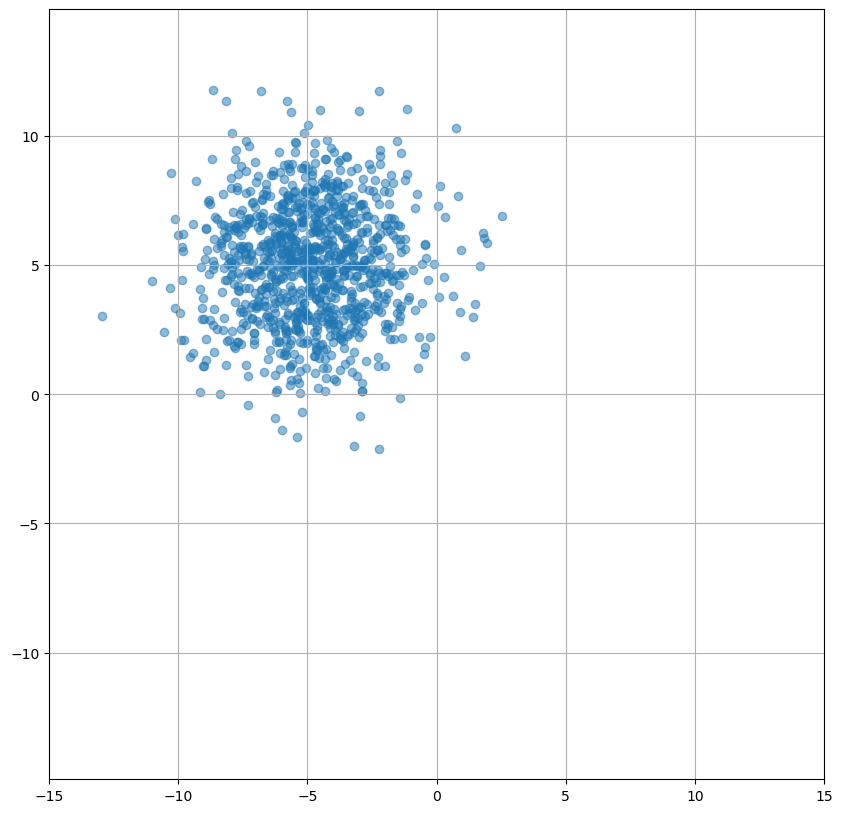

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.axis('equal')
plt.grid()
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.show()

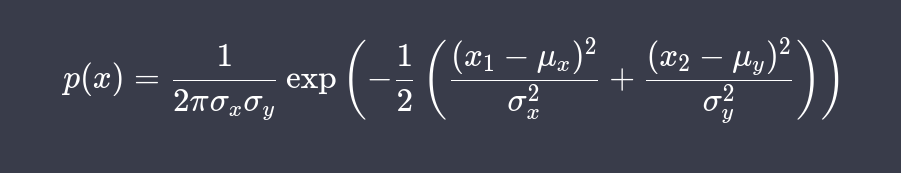

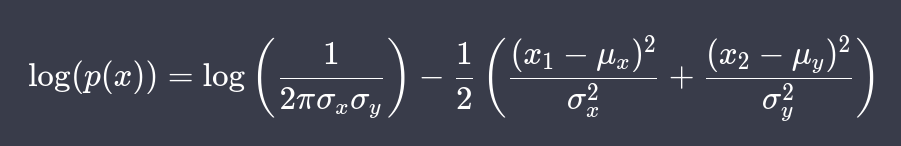

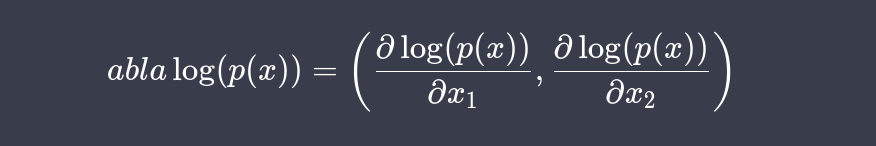

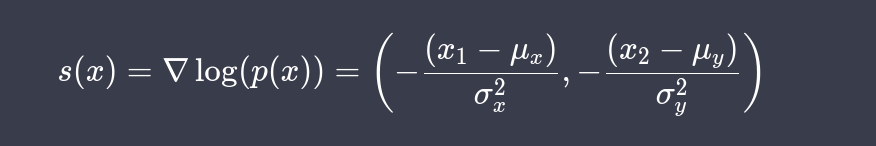

In [26]:
def score_func (x, y, mu=[-5, 5], var=[5, 5]):
    mu_x, mu_y = mu
    var_x, var_y = var
    el = [(-(x-mu_x)/var_x), (-(y-mu_y)/var_y)]
    return el   

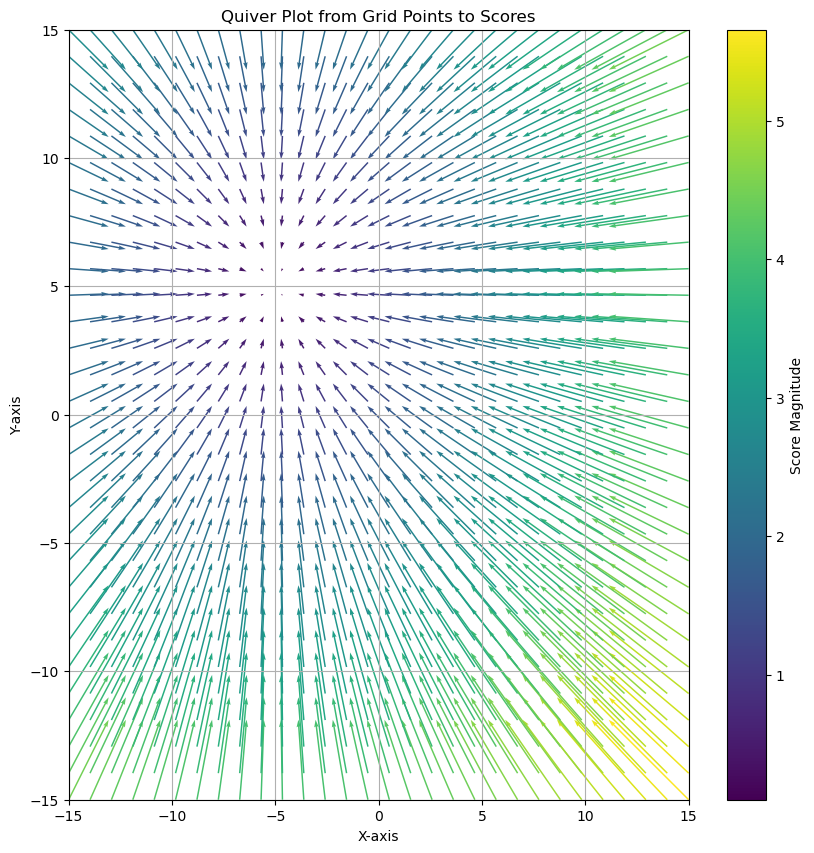

In [85]:
x = np.linspace(-15, 15, 30)
y = np.linspace(-15, 15, 30)
X, Y = np.meshgrid(x, y)   
Z1, Z2 = score_func(X, Y)
Z = ((Z1)**2+(Z2)**2)**(1/2)
U = Z1
V = Z2

plt.figure(figsize=(10, 10))
plt.quiver(X, Y, U, V, Z, scale=5, scale_units='inches') 
plt.colorbar(label='Score Magnitude')
plt.title('Quiver Plot from Grid Points to Scores')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.grid()
plt.show()


langevin dynamics: x(t+1) = x(t) + e*S(t) + ((2*e)**(1/2)) Z(t)

In [152]:
import random
def langevin_sampling(e=0.5, step_num=10):
    trajectory = []
    x0 = random.randint(-15, 15)
    y0 = random.randint(-15, 15)
    trajectory.append([x0, y0])
    for i in range(step_num):
        noise = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=1)
        xp = trajectory[i][0]
        yp = trajectory[i][1]
        magnitude = (xp**2+yp**2)**(1/2)
        sp = magnitude*(score_func(xp, yp)[0]) , magnitude*(score_func(xp, yp)[1])
        xn = xp + e*sp[0] + ((2*e)**(1/2))*noise[0][0]
        yn = yp + e*sp[1] + ((2*e)**(1/2))*noise[0][1]
        trajectory.append([xn, yn])
    return trajectory    

In [153]:
trajec = langevin_sampling()

In [154]:
trajec = np.array(trajec)

In [155]:
trajec

array([[ -2.        , -13.        ],
       [ -5.18712638,   9.24217118],
       [ -4.55910679,   5.60213455],
       [ -4.03898234,   6.21366331],
       [ -4.84891687,   3.87068876],
       [ -5.03901588,   5.19130106],
       [ -4.69089308,   4.62094196],
       [ -5.31104802,   4.36296278],
       [ -5.32795986,   6.13966096],
       [ -5.90923956,   4.40725978],
       [ -5.47899436,   5.75966082]])

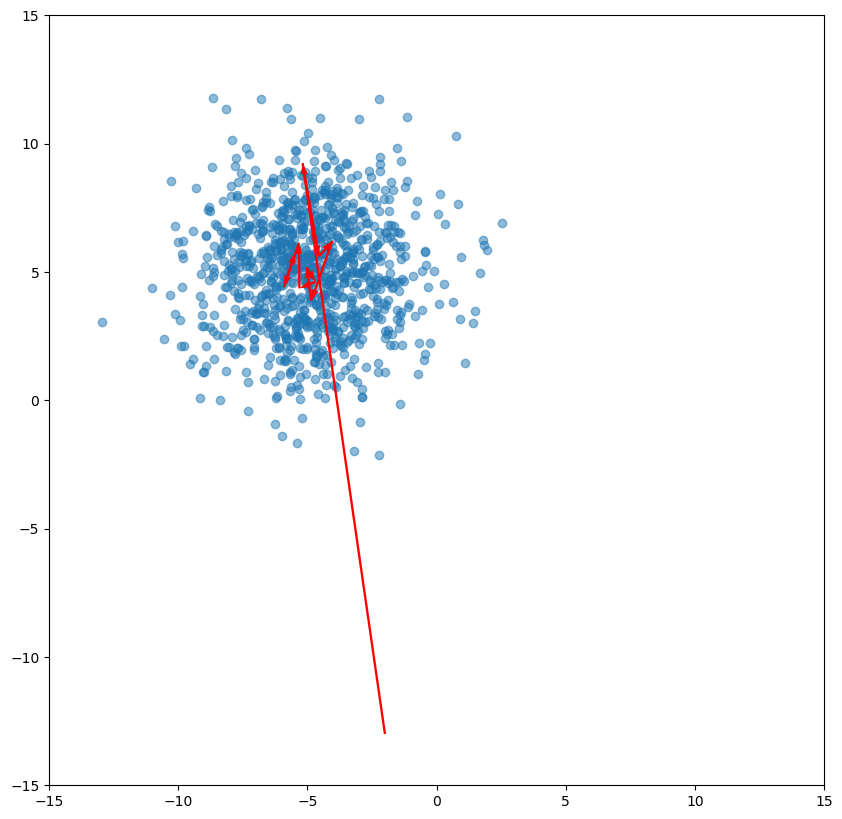

In [156]:
plt.figure(figsize=(10, 10))
x = trajec[:, 0]
y = trajec[:, 1]
dx = np.diff(x)
dy = np.diff(y)
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.quiver(x[:-1], y[:-1], dx, dy, angles='xy', scale_units='xy', scale=1, width=0.003, color='r', label='Direction')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.show()

In [127]:
def sampling(sample_num = 1000):
    samples = []
    for _ in range (sample_num):
        tr = langevin_sampling()
        samples.append(tr[-1])
    return samples    

In [128]:
langevin_samples = sampling()

In [129]:
langevin_samples = np.array(langevin_samples)

In [81]:
numpy_samples = np.random.multivariate_normal(mean=[-5, 5], cov=[[5, 0], [0, 5]], size=1000)

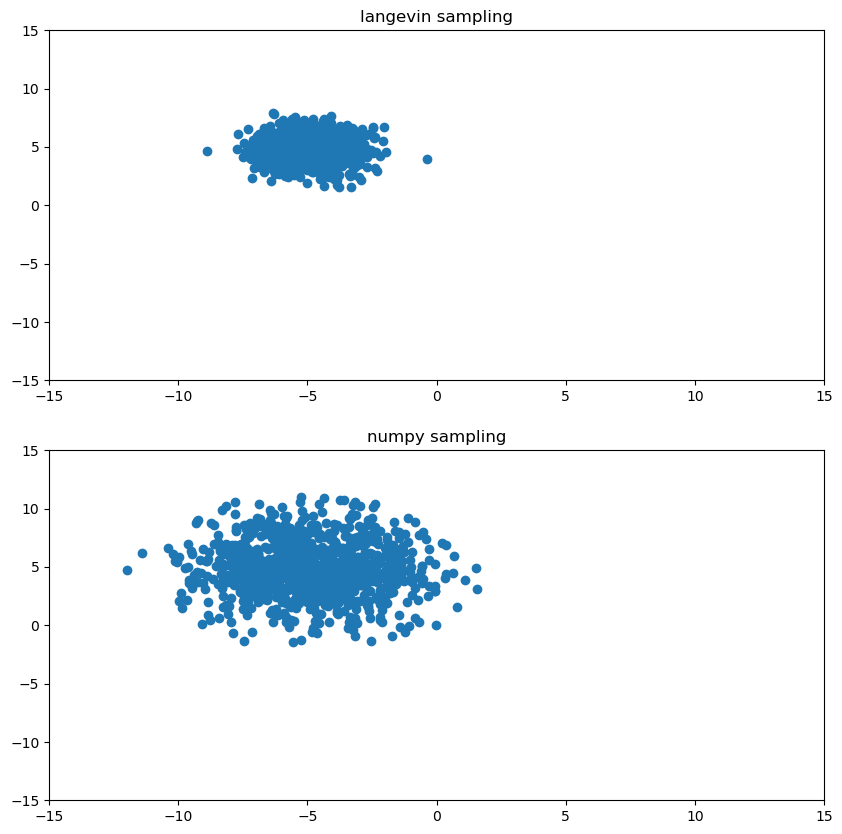

In [134]:
fig , axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].scatter(langevin_samples[:, 0], langevin_samples[:, 1])
axs[0].set_title('langevin sampling')
axs[0].set_xlim(-15, 15)
axs[0].set_ylim(-15, 15)
axs[1].scatter(numpy_samples[:, 0], numpy_samples[:, 1])
axs[1].set_title('numpy sampling')
axs[1].set_xlim(-15, 15)
axs[1].set_ylim(-15, 15)
plt.show()

# bonus example

In [178]:

mu1 = [1, 2] 
sigma1 = [[1, 0], [0, 1]]
mu2 = [4, 5]  
sigma2 = [[1, 0], [0, 1]]
alpha = 0.7  
def sample_noise(alpha=0.7, mu1=[1, 2], sigma1=[[2,0],[0,2]], mu2=[7,9], sigma2=[[1,0],[0,1]], size=1):
    samples = np.random.uniform(size=size)
    sampled_points = np.zeros((size, len(mu1)))
    
    for i in range(size):
        if samples[i] < alpha:
            sampled_points[i] = np.random.multivariate_normal(mu1, sigma1)
        else:
            sampled_points[i] = np.random.multivariate_normal(mu2, sigma2)
    return sampled_points

In [205]:
import random
def langevin_sampling2(e=0.5, step_num=10):
    trajectory = []
    x0 = random.randint(-15, 15)
    y0 = random.randint(-15, 15)
    trajectory.append([x0, y0])
    for i in range(step_num):
#         noise = sample_noise()
        noise = np.random.multivariate_normal(mean=[3, 10], cov=[[1, 0], [0, 1]], size=1)
        xp = trajectory[i][0]
        yp = trajectory[i][1]
        magnitude = (xp**2+yp**2)**(1/2)
        sp = magnitude*(score_func(xp, yp)[0]) , magnitude*(score_func(xp, yp)[1])
        xn = xp + e*sp[0] + ((2*e)**(1/2))*noise[0][0]
        yn = yp + e*sp[1] + ((2*e)**(1/2))*noise[0][1]
        trajectory.append([xn, yn])
    return trajectory 

In [206]:
def sampling2(sample_num = 1000):
    samples = []
    for _ in range (sample_num):
        tr = langevin_sampling2()
        samples.append(tr[-1])
    return samples  

In [207]:
langevin_samples = sampling2()
langevin_samples = np.array(langevin_samples)

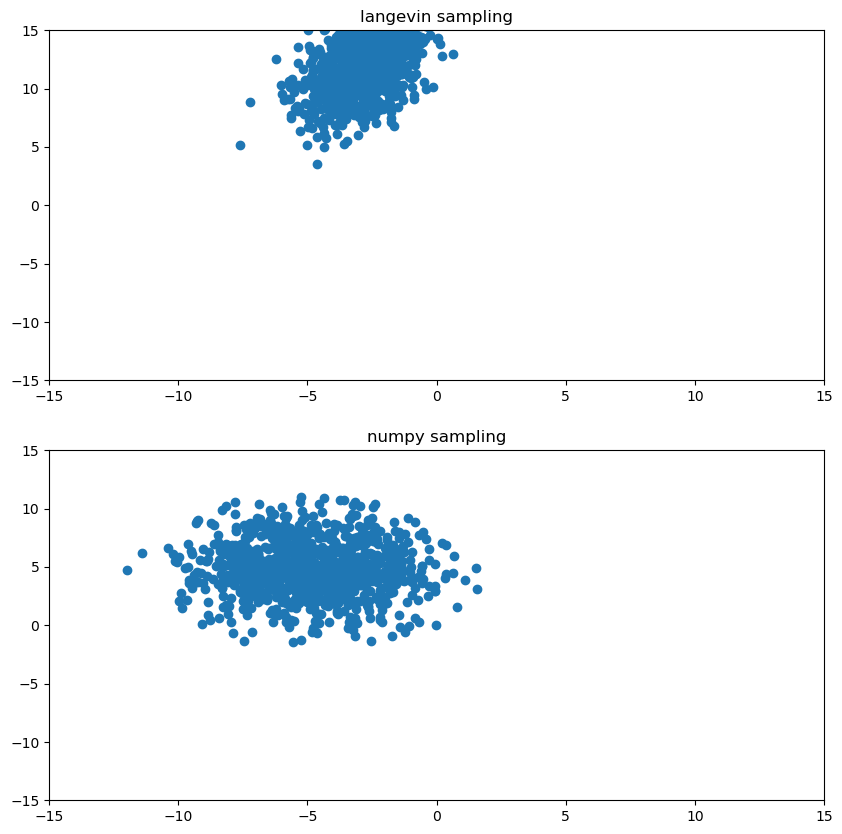

In [208]:
fig , axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].scatter(langevin_samples[:, 0], langevin_samples[:, 1])
axs[0].set_title('langevin sampling')
axs[0].set_xlim(-15, 15)
axs[0].set_ylim(-15, 15)
axs[1].scatter(numpy_samples[:, 0], numpy_samples[:, 1])
axs[1].set_title('numpy sampling')
axs[1].set_xlim(-15, 15)
axs[1].set_ylim(-15, 15)
plt.show()

by choosing different means and variance either for one Gaussian distribution or combination of two Gaussian distributions with different probibility, I came to the conclusion that :


for single distribution the mean and variance can change the mean and variance of the funcyoin we are sampling and the result may be false for noticable difference.

so if we use a combinational distribution we can get false samples if:

1) both distributions have means far from 0. or both have variance distinguishably large.
2) one of the distributions has the conditions above and its probibility is more than 0.5.

besides if the probibilities of the two are almost the same but they vary alot in means, we will get two erea of convergence and two clussters of samples on the map. 